We learned that text files are one of the most common ways to store and handle data, and their presence in any data science project is a certainty. Consequently, being able to handle text files is a very useful skill.

This skill is called **text processing**. Here are some tasks that fall under this concept:

* Reformatting the text
* Extracting specific parts of the text
* Modifying the text

We already learned how to do some text processing in Python when we learned about regular expressions and other techniques to deal with strings.

One of the advantages of the shell over Python is since commands interact more intimately with the filesystem, it tends to be faster for tasks directly concerning input and output of files. It's very common to use the shell to prune a text file to obtain only the information that is relevant to us, and then work on it using Python.

In this file we're going to be learning how to use some of the shell's most popular commands to work with text files. A couple of examples are **sort** and **grep**.

It's very common in a business to have text files with data pertaining to a certain time period; many times we'll have one file per day, per subject. A possible representation of this is in the image below, where we see one daily file for sales.

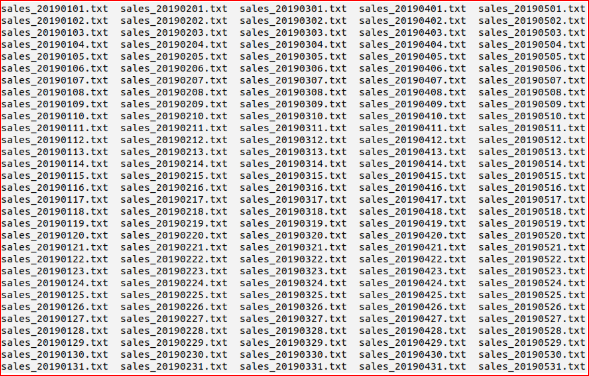

If we're required to do an analysis for the whole year, we'll need to work with all these files.

We can stack them on top of each other with the cat (for concatenate) command.

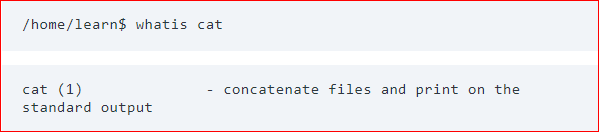

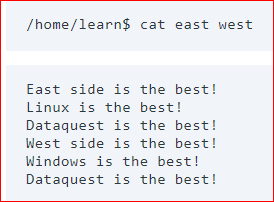

Question:
    
Concatenate all the files in a directory

Answer:

cat *

We also have the tac command. It does the same, only it reverses the order (tac is the reverse of cat) of the lines (while keeping the order of the files).

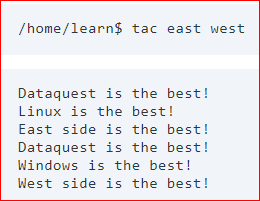

We used **column** to display the whole contents of a file. We can use **cat** to do the same by passing the filename to cat.

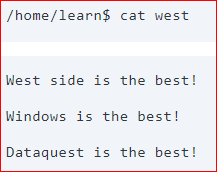

Since this isn't the primary purpose of cat and since there are other options for displaying the contents of files, this is called a cat abuse

However the use of cat in this way is very, very common and unless there is good reason not to do it, it's probably worth it to just go ahead and use it.

# Sort

Often, we'll want to view a sorted version of the contents of a file. The sort command helps us with this. Let's begin by recalling that the contents of west are:

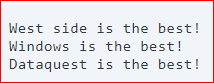

Let's now pass this filename as an argument to sort:

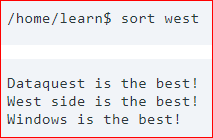

We see that it sorted the lines of the files lexicographically.

This command has many options. We'll look into the options -r for (reversing the order) and -u (for keeping only unique results, in other words, for getting rid of duplicates).

Let's see the result of passing the -r option to the command we just ran:

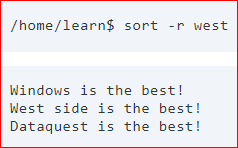

This command can also accept more than one file as an argument. Running sort east west will concatenate the contents of both files and sort them. We are going to do this, but in addition, we'll also pass along the -u option to the command.

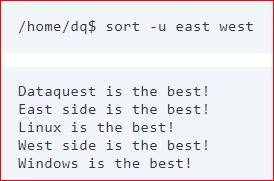

Notice that, in addition to sorting the contents of both files, it kept only one of the occurrences of **Dataquest is the best!** (which is originally present in both files). This happened because of the inclusion of -u option (for unique). So we see that we can also use sort to remove duplicates — a very common data wrangling necessity!

Question:

Sort the contents of the files **Interdisciplinary** and **Law & Public Policy** in reverse order, excluding duplicate records. This must be done in the same command.

Answer:

sort -ru Interdisciplinary "Law & Public Policy"

Something important to be aware of is that sort places each lowercase letter immediately above its uppercase version. The contents of the file vowels are:

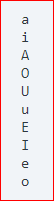

Let's sort it:

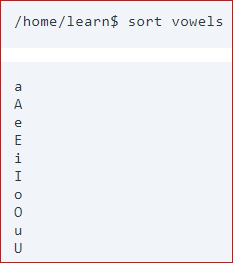

This helps explain why the wildcard [a-z] sometimes yields unintuitive results (like a<A<e). 

Sorting, by default, uses the lexicographic order on the whole content of the line. When working with data sets, we frequently want to sort by specific columns.

We've removed the header of the file example_data.csv. Here are its contents.

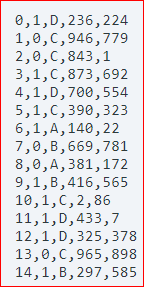

We see that it is sorted by the first column. We are going to sort it again on this column anyway (which will result in the exact same thing), for two reasons:

* To show how the syntax works.
* To show possible pitfalls.

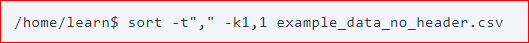

Let's break down the options:

* -t"," tells the shell that the fields are separated by **,**. Not including this option causes the shell to use the default parameters (spaces and tabs), instead of commas, (just like the column command with the -s option). In this case, it would mean that the whole line itself would be the only field. The field separator is one of the pitfalls to beware of.
* To sort by the first column, we pass in the -k (for key) option followed by 1,1. In general, to sort by a specific column, we pass to -k, in order:
 * The index of the column we want to sort by
 * A comma (,)
 * The same index that we used above.

Here's the output:

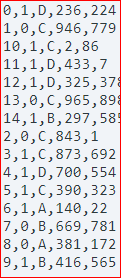

It doesn't seem to be sorted. For instance, 10 comes up before 2.

What happened here is that the shell sorted it lexicographically:

* 0 before 1,
* 1 before 2,
* And so on.

This is another pitfall. To make the shell sort the numbers numerically, we can pass in the -g option together with the -k option.

/home/learn$ sort -t"," -k1,1g example_data_no_header.csv

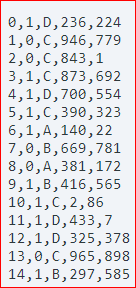

To sort on multiple columns, we include a parameter — like -k1,1g that we used in the previous example — for each column. Here's an example where we sort example_data_no_header.csv first by its second column in the reverse order, then by its fourth column, both numerically:

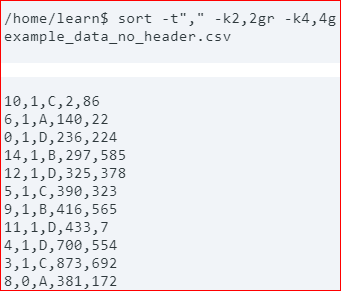

In reality, the option -k receives as an argument a range. When we pass the option-parameters 1,1 or 4,4 to -k, we are passing ranges. In these cases they are ranges each with one column only.

When we pass a range of the form start,stop, sort will look at the columns start through stop as one field only.

For example, if we run sort -t"," -k4,5 example_data_no_header.csv, the command will look at the characters from the fourth and fifth columns as one field only. This is how sort sees the file before sorting it with the above command:

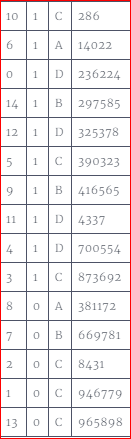

Question:

Sort characters_no_header by its third field lexicographically, and by its fourth field numerically in reverse order. Reverse order only on the fourth field.

Answer:

sort -t":" -k3,3 -k4,4gr characters_no_header

# Cut 

Oftentimes, we'll only be interested in seeing certain columns of a data set. The cut commands helps us with displaying selected columns. In the example below, we'll extract the second and fifth columns of the file example_data.csv that we've been working with:

/home/learn$ cut -d"," -f2,5 example_data.csv

* -d"," tells cut to use , as the delimiter of the fields (or columns).
 * Note that the equivalent option in sort is -t. It's important to read the documentation to deal with details like these.
* -f specifies that we'll be selecting certain fields.
 * The parameter 2,5 passed to -f tells it to select the second and fifth fields.

We can also select a range of fields by using -, in a similar way to what we have seen before. If we want to select the second, third and fourth fields, we can do so by passing 2-4 to -f. For instance, running cut -d"," -f2-4 example_data.csv yields:

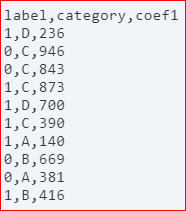

We can also mix field ranges with specific fields — like -f2,3,7-9 — if a file has enough fields. Unfortunately, cut doesn't permit reordering the columns.

Question:

Pint to screen the columns corresponding to the fields Major, Sample_size, Employed and Unemployed of the file **Computers & Mathematics**.

Answer:

cut -d"," -f2,4-6 "Computers & Mathematics"

# grep

One of the most beautiful things about Unix-like shells is the **grep** command.

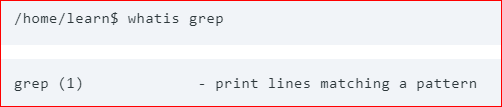

This command has many options; we'll look into several of them. Explore the man page of grep to have a feel for its power. We'll begin by taking a look at an adapted usage message:

**grep [-Einv] 'PATTERN' [FILE]...**

Let's see an example using the characters_no_header file whose contents are

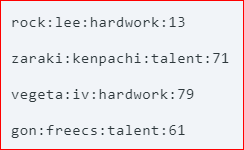

Here we go:

**/home/learn$ grep -n '[aeiou].[aeiou]' characters_no_header**

The pattern [aeiou].[aeiou] matches any lowercase vowel, followed by any character (other than new line characters), followed by any lowercase vowel. The -n option displays what line the match corresponds to. Let's see the results:

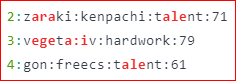

If we inspect the contents of the file, we see that this is the expected result.

This command works line by line, so we can't make it match across multiple lines. Most of the time, the quotes encompassing the pattern are optional, but, as a best practice, it's best to keep them.

We'll now try running the same command, replacing the -n option with -v. But first, let's see what this option does. Here's the relevant excerpt from the documentation:

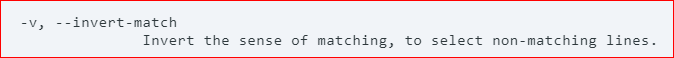

So by running grep -v [aeiou].[aeiou] characters_no_header, we expect to get all the lines that do not match the pattern — this time without the line numbering, because we removed -n.

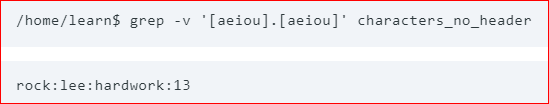

The -i option is the short form of the self-descriptive long option --ignore-case. It makes it so that case does not matter in the pattern. It's the same functionality as the re.IGNORECASE flag in Python

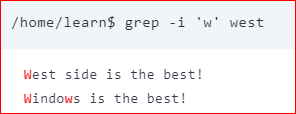

It also matched uppercase W, as expected. As a sanity check, let's rerun this command without the -i option.

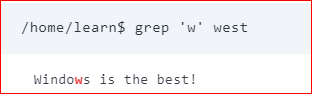

Question:

1. Use grep to print to screen any lines of characters_no_header that do not end with the number 9. You can use the regex pattern 9$ to match lines ending with 9.

2. Use grep to print to screen any lines of any file in rg_data that have fields starting with the word math, while ignoring case. (Since the first field is always numeric, we don't have to account for it.) We can use the regex pattern ,Math to match lines that have fields (other than the first) starting with Math.

Answer:

1. grep -v "9$" characters_no_header
2. grep -i ',Math' *

We might have noticed the -E option in the usage message, it stands for extended regular expressions. Let's read from the grep man page:

REGULAR EXPRESSIONS
* A regular expression is a pattern that describes a set of strings. Regular expressions are constructed analogously to  arithmetic expressions, by using various operators to combine smaller expressions.

* grep understands three different versions of regular expression  syntax: “basic” (BRE), “extended” (ERE) and “perl” (PCRE). In GNU grep, there is no difference in available functionality between basic and extended syntaxes. In other implementations, basic regular expressions are less powerful. The following description applies to extended regular expressions; differences for basic regular expressions are summarized  afterwards.

So we see that there is more than one kind of regular expression. By default grep uses BRE. The difference between BRE and ERE is one of syntax, but not of capability.

For increased portability we should be using the -E option, as the statement that says that "there is no difference in available functionality between basic and extended syntaxes", doesn't hold for non-GNU implementations of grep, like those natively found in Mac systems.

Further down the man page we read

**Basic vs Extended Regular Expressions**

* In  basic  regular expressions the meta-characters ?, +, {, |, (, and ) lose their special meaning; 
* instead use the backslashed versions `\?`, `\+`, `\{`, `\|`, `\(`, and `\`).

In other words, for us to use the functionality of the listed characters as we learned in Python, we should be using the -E option, while quoting the pattern. This will give us a close approximation to what we learn before. Although most of the patterns will work the same way, there are still some differences between ERE and Python's regular expressions, but we won't be getting into them here. If we wish we can learn more about this in [regular-expressions.info](https://www.regular-expressions.info/).